In [2]:
import pandas as pd
import datetime
import matplotlib.dates as mdates

# load URLs
confirmed_cases_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/refs/heads/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
deaths_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/refs/heads/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv'

# read csvs
confirmed_cases = pd.read_csv(confirmed_cases_url)
deaths = pd.read_csv(deaths_url)

In [3]:
# verify successful read
print(confirmed_cases.head())
print(deaths.head())

        UID iso2 iso3  code3    FIPS   Admin2 Province_State Country_Region  \
0  84001001   US  USA    840  1001.0  Autauga        Alabama             US   
1  84001003   US  USA    840  1003.0  Baldwin        Alabama             US   
2  84001005   US  USA    840  1005.0  Barbour        Alabama             US   
3  84001007   US  USA    840  1007.0     Bibb        Alabama             US   
4  84001009   US  USA    840  1009.0   Blount        Alabama             US   

         Lat      Long_  ... 2/28/23  3/1/23  3/2/23  3/3/23  3/4/23  3/5/23  \
0  32.539527 -86.644082  ...   19732   19759   19759   19759   19759   19759   
1  30.727750 -87.722071  ...   69641   69767   69767   69767   69767   69767   
2  31.868263 -85.387129  ...    7451    7474    7474    7474    7474    7474   
3  32.996421 -87.125115  ...    8067    8087    8087    8087    8087    8087   
4  33.982109 -86.567906  ...   18616   18673   18673   18673   18673   18673   

   3/6/23  3/7/23  3/8/23  3/9/23  
0   1975

In [4]:
# choose cities of interest
cities = ['San Juan', 'Churchill', 'Santa Fe']

confirmed_dict = {}
deaths_dict = {}

# restrict to chosen cities
for city in cities:
    new_df_confirmed = confirmed_cases[confirmed_cases['Admin2']==city]
    confirmed_dict[city] = new_df_confirmed
    new_df_deaths = deaths[deaths['Admin2']==city]
    deaths_dict[city] = new_df_deaths

The following code makes plots for total confirmed cases and deaths over time in Churchill.

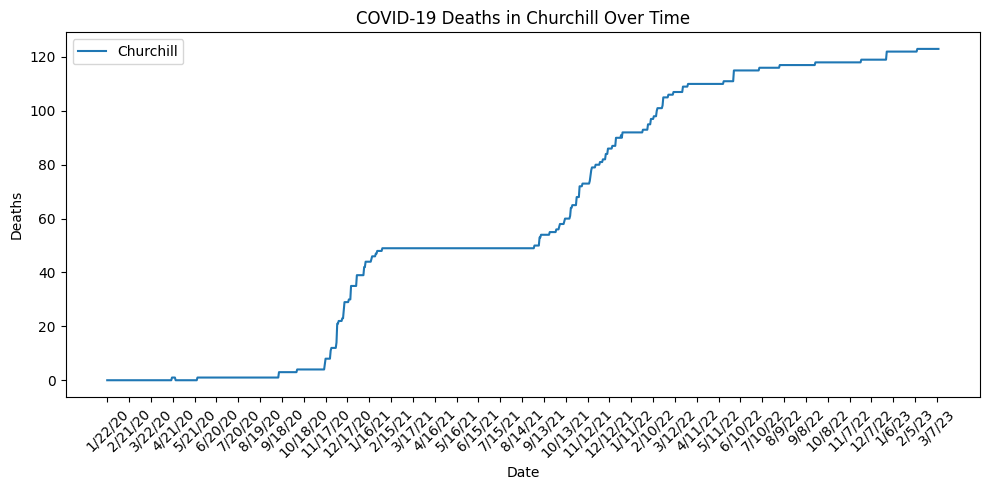

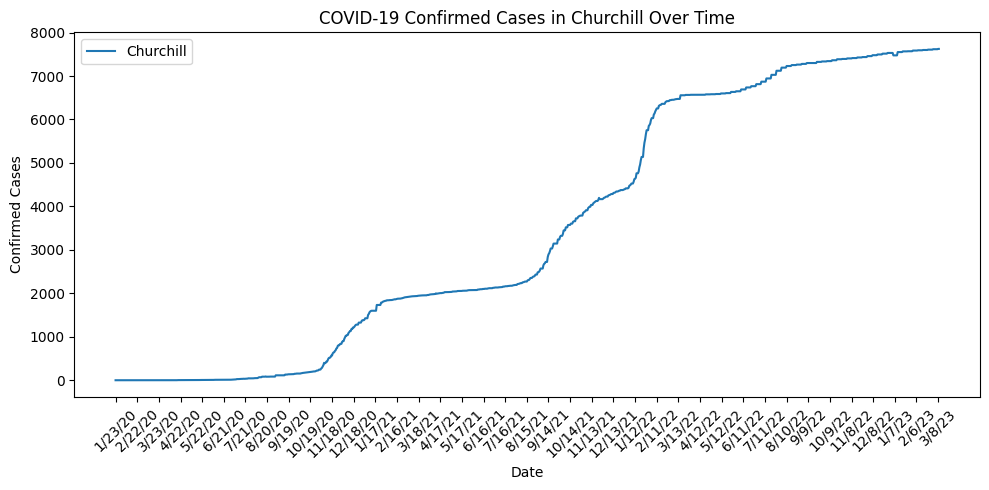

In [5]:
import matplotlib.pyplot as plt

churchill_death_df = deaths_dict['Churchill']
date_cols_deaths = churchill_death_df.columns[12:]
cases = churchill_death_df.iloc[0]

# Only select the date columns for plotting
death_dates = date_cols_deaths
deaths = cases[date_cols_deaths].astype(float)

plt.figure(figsize=(10, 5))
plt.plot(death_dates, deaths, label='Churchill')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.title('COVID-19 Deaths in Churchill Over Time')
tick_locs = range(0, len(death_dates), 30)
tick_labels = death_dates[tick_locs]
plt.xticks(ticks=tick_locs, labels=tick_labels, rotation=45)
plt.legend()
plt.tight_layout()

plt.show()

churchill_confirmed_df = confirmed_dict['Churchill']
date_cols = churchill_confirmed_df.columns[12:]
confirmed_cases_chill = churchill_confirmed_df.iloc[0]

# Only select the date columns for plotting
confirmed_dates = date_cols
confirmed_cases_chill = confirmed_cases_chill[date_cols].astype(float)

plt.figure(figsize=(10, 5))
plt.plot(confirmed_dates, confirmed_cases_chill, label='Churchill')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title('COVID-19 Confirmed Cases in Churchill Over Time')
tick_locs = range(0, len(confirmed_dates), 30)
tick_labels = confirmed_dates[tick_locs]
plt.xticks(ticks=tick_locs, labels=tick_labels, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

Code for plotting fraction of population infected over time in Churchill.

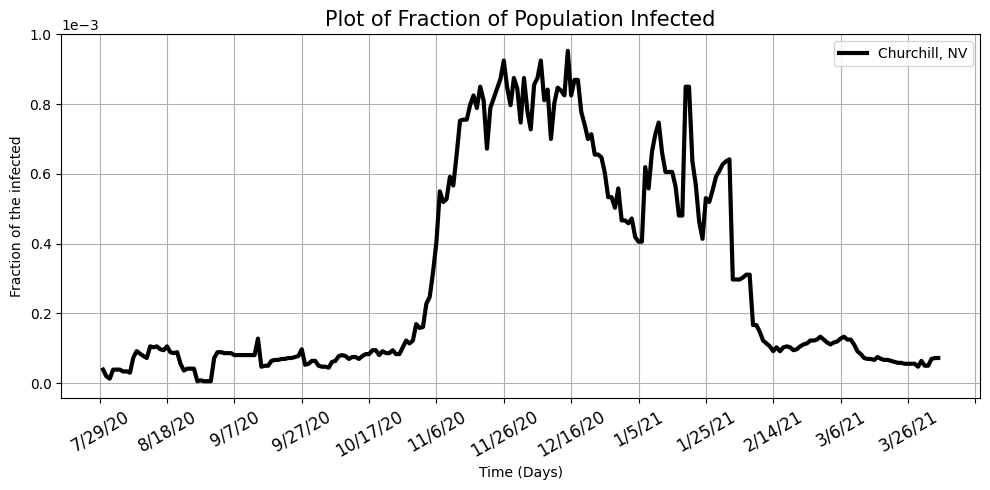

In [6]:
population = 25715   
num_days = 250     

fig, ax = plt.subplots(figsize=(10,5))
plt.plot(churchill_confirmed_df.iloc[0,200:450].diff().rolling(14, min_periods = 1).mean()/population, label="Churchill, NV", color="k", linewidth=3)
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
plt.xticks(rotation = 30,fontsize=12)
plt.legend(loc = 'best')
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,4))
plt.xlabel('Time (Days)')
plt.ylabel('Fraction of the infected')
plt.title('Plot of Fraction of Population Infected',fontsize=15)
plt.grid()
plt.tight_layout()

plt.show()


We now restrict data to counties with population ~10k

In [9]:
# choose cities of interest
cities = ['Bullock', 'Coosa', 'Lowndes', 'Wilcox']
populations = [10357, 10387, 10311, 10600]

confirmed_dict = {}
deaths_dict = {}

# restrict to chosen cities
for index, city in enumerate(cities):
    new_df_confirmed = confirmed_cases[confirmed_cases['Admin2']==city]
    confirmed_dict[city] = new_df_confirmed
    new_df_deaths = deaths[deaths['Admin2']==city]
    deaths_dict[city] = new_df_deaths
    print(confirmed_dict)
    confirmed_dict[city]['Population'] = populations[index]
    deaths_dict[city]['Population'] = populations[index]
    

{'Bullock':         UID iso2 iso3  code3    FIPS   Admin2 Province_State Country_Region  \
5  84001011   US  USA    840  1011.0  Bullock        Alabama             US   

         Lat      Long_  ... 2/28/23  3/1/23  3/2/23  3/3/23  3/4/23  3/5/23  \
5  32.100305 -85.712655  ...    3020    3025    3025    3025    3025    3025   

   3/6/23  3/7/23  3/8/23  3/9/23  
5    3025    3025    3030    3030  

[1 rows x 1154 columns]}
{'Bullock':         UID iso2 iso3  code3    FIPS   Admin2 Province_State Country_Region  \
5  84001011   US  USA    840  1011.0  Bullock        Alabama             US   

         Lat      Long_  ... 3/1/23  3/2/23  3/3/23  3/4/23  3/5/23  3/6/23  \
5  32.100305 -85.712655  ...   3025    3025    3025    3025    3025    3025   

   3/7/23  3/8/23  3/9/23  Population  
5    3025    3030    3030       10357  

[1 rows x 1155 columns], 'Coosa':          UID iso2 iso3  code3    FIPS Admin2 Province_State Country_Region  \
18  84001037   US  USA    840  1037.0  Coosa   

C:\Users\amyyy\AppData\Local\Temp\ipykernel_27244\1794269952.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  confirmed_dict[city]['Population'] = populations[index]
C:\Users\amyyy\AppData\Local\Temp\ipykernel_27244\1794269952.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deaths_dict[city]['Population'] = populations[index]
C:\Users\amyyy\AppData\Local\Temp\ipykernel_27244\1794269952.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

In [ ]:
print(confirmed_dict)

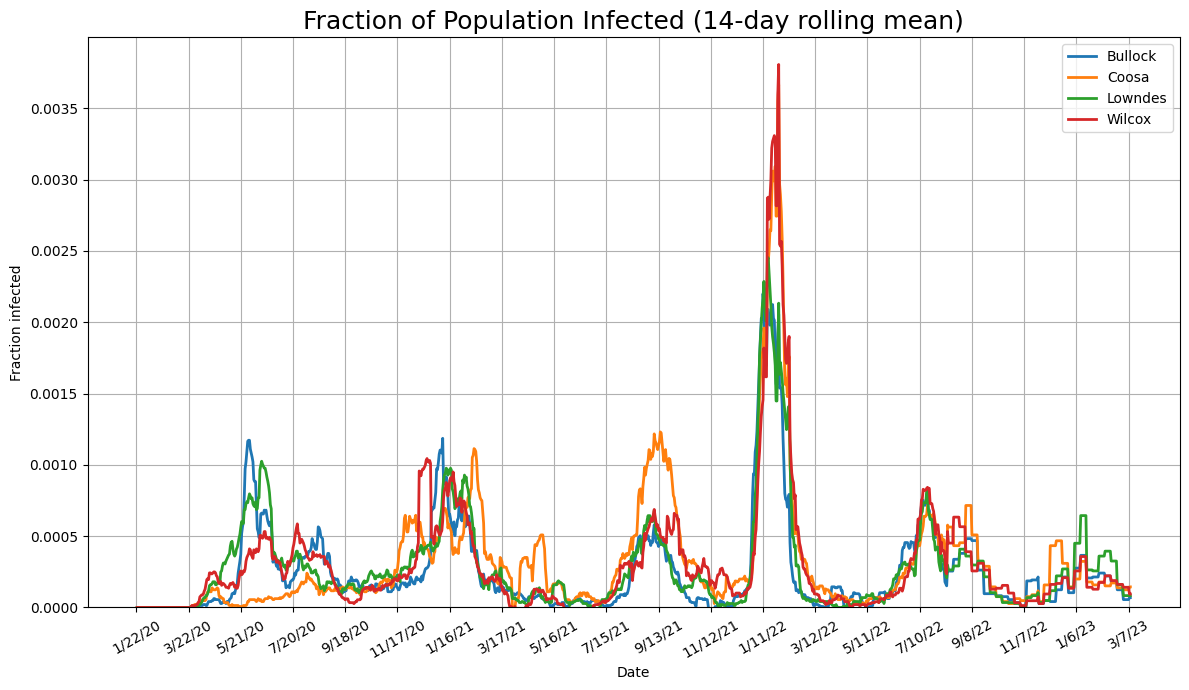

In [11]:
import matplotlib.pyplot as plt

# Find the global max for y-axis scaling
max_fraction = 0
fractions = []
for idx, city in enumerate(cities):
    city_df = confirmed_dict[city]
    population = populations[idx]
    # Find the date columns (skip non-date columns)
    date_cols = city_df.columns[city_df.columns.get_loc('Combined_Key')+1:-1]
    # Use only the first row for each city (in case of duplicates)
    series = city_df.iloc[0][date_cols].astype(float)
    fraction = series.diff().rolling(14, min_periods=1).mean() / population
    fractions.append(fraction)
    max_fraction = max(max_fraction, fraction.max())

plt.figure(figsize=(12, 7))
for idx, city in enumerate(cities):
    plt.plot(date_cols, fractions[idx], label=city, linewidth=2)
plt.title('Fraction of Population Infected (14-day rolling mean)', fontsize=18)
plt.xlabel('Date')
plt.ylabel('Fraction infected')
plt.ylim(0, max_fraction * 1.05)
plt.grid(True)
plt.legend()
plt.xticks(ticks=range(0, len(date_cols), 60), labels=date_cols[::60], rotation=30)
plt.tight_layout()
plt.show()
